# Medical Insurance Cost Prediction


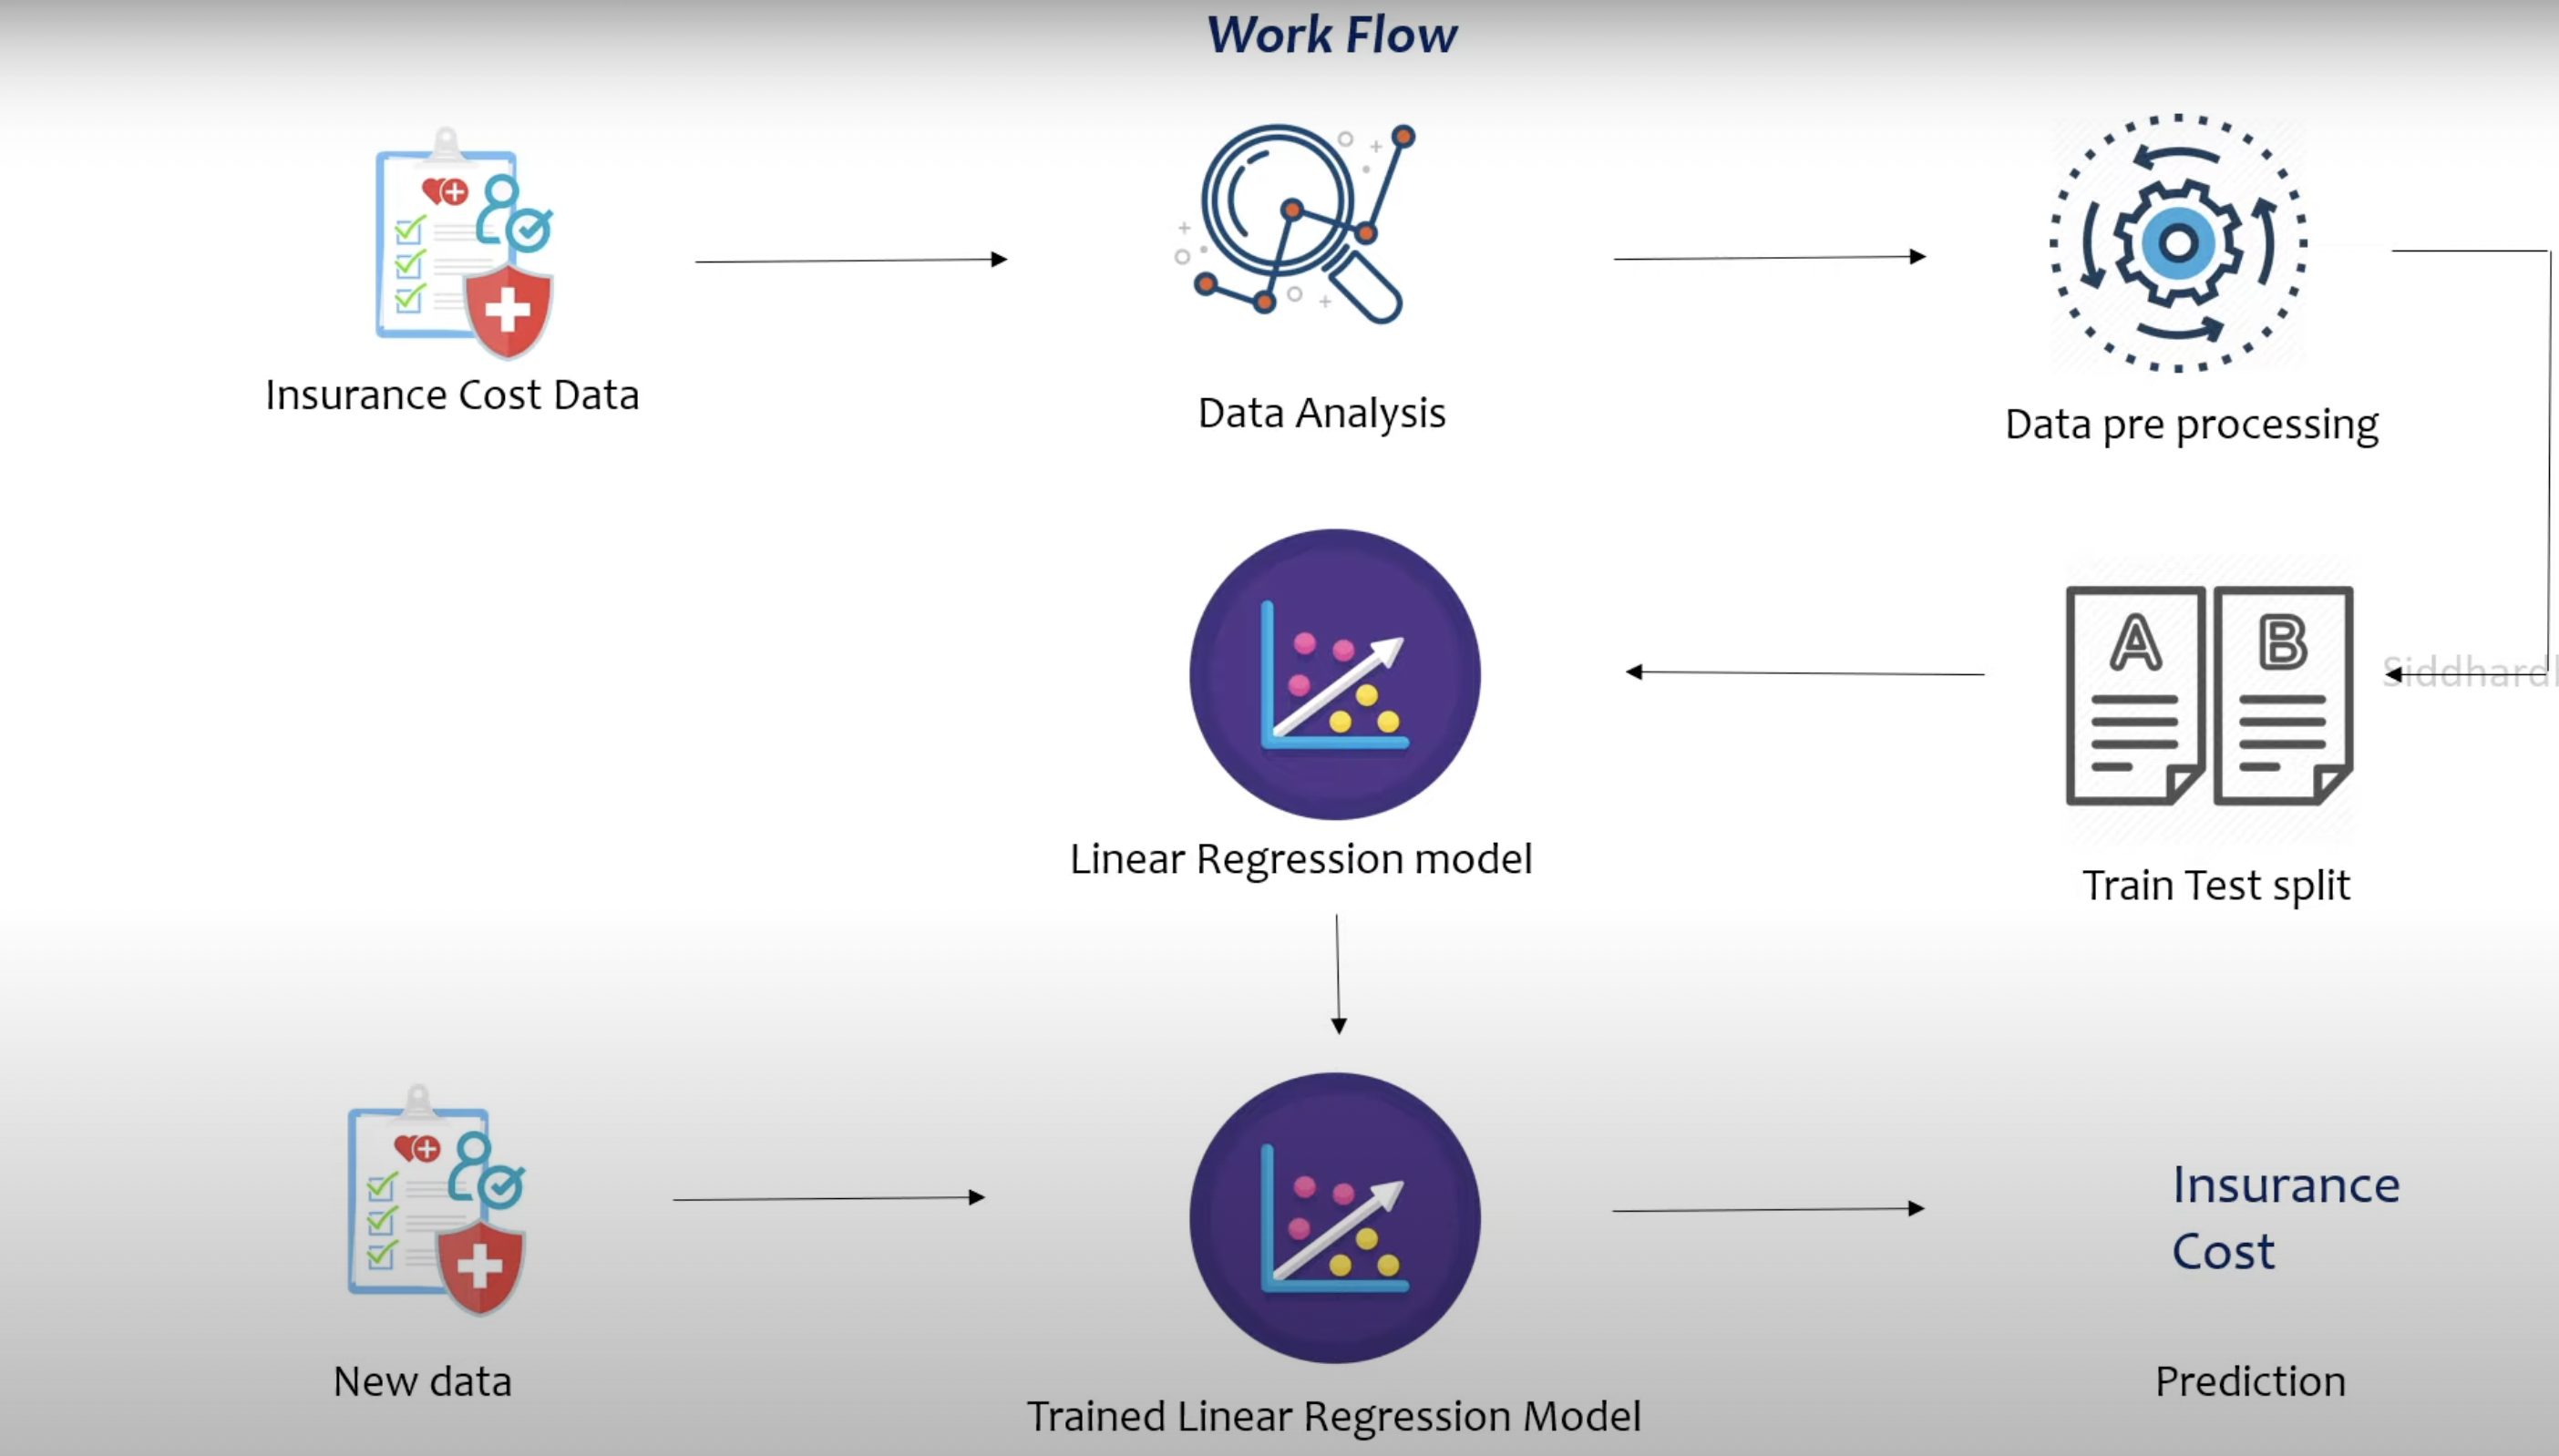

In [1]:
#Importing the dependencies (importing libraries and functions)

import numpy as np #used for creating numpy arrays
import pandas as pd #used for creating dataframes(structured tables) - makes data processing easy
import matplotlib.pyplot as plt
import seaborn as sns #data visulaization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics #helps in evaluating our model

### Data Collection and Analysis

In [3]:
#loading data from a csv file to a Pandas Dataframe

insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
# first five rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# no. of rows and coloumns
insurance_dataset.shape

(1338, 7)

In [8]:
# getting information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Categorical Features: sex, smoker, region

In [10]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [12]:
# Statistical Measure of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

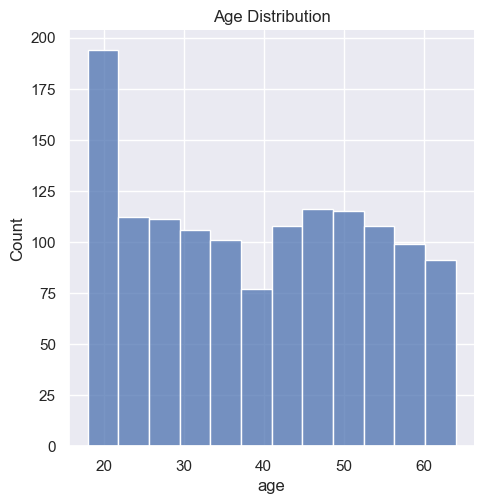

In [17]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])# displot says how the values are distributed throughout the dataset
plt.title('Age Distribution')
plt.show()

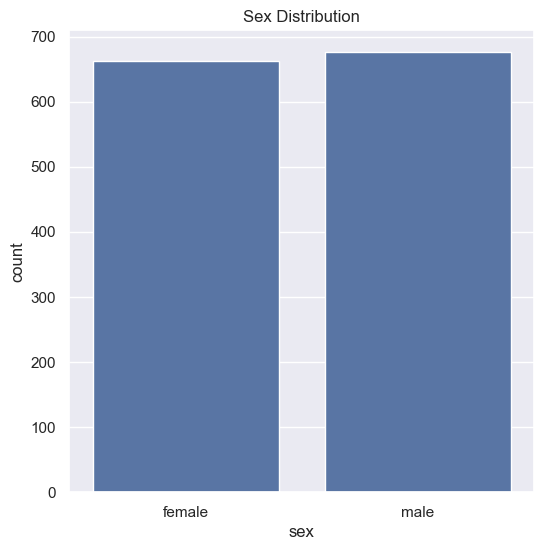

In [20]:
# Gender coloumn 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [22]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

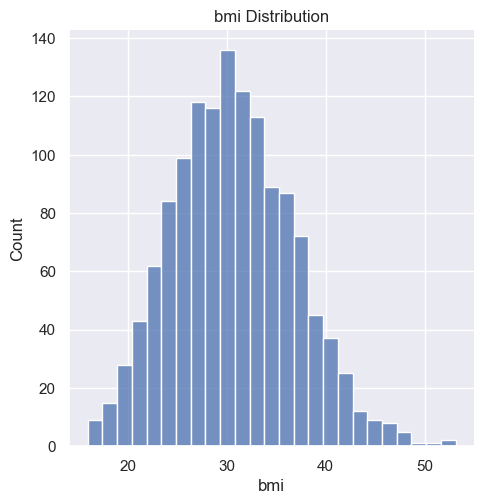

In [24]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])# displot says how the values are distributed throughout the dataset
plt.title('bmi Distribution')
plt.show()

# normal bmi range is 18.5 to 24.9

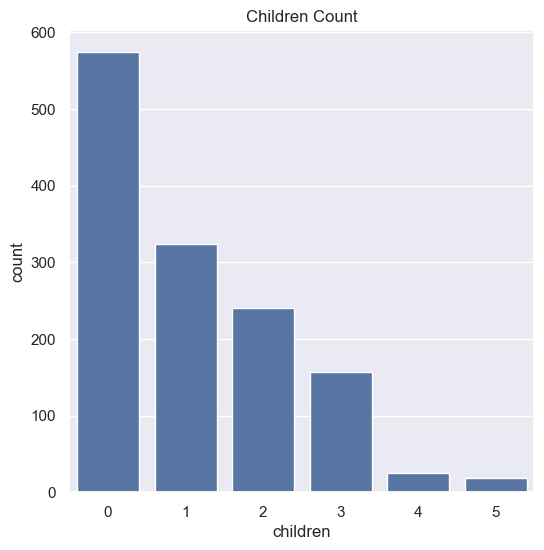

In [25]:
# Children coloumn 
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Count')
plt.show()

In [31]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

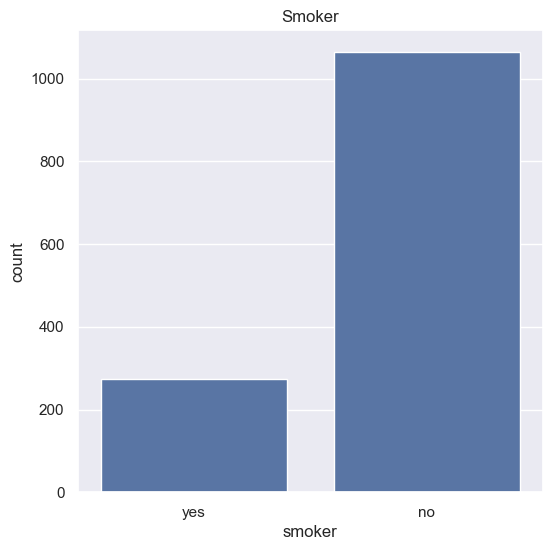

In [32]:
# Smoker coloumn 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [33]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

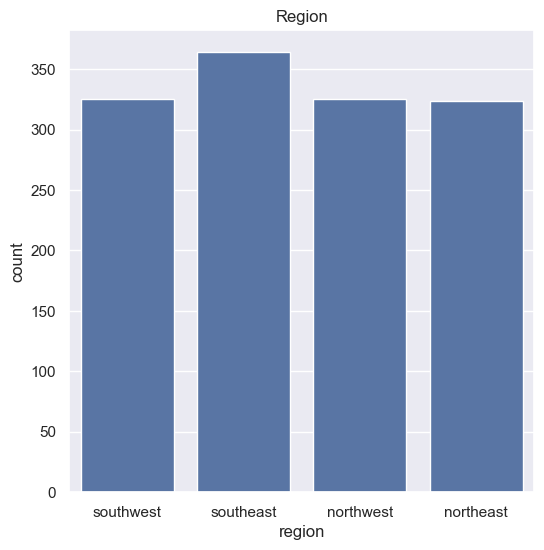

In [34]:
# Region coloumn 
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()

In [35]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x600 with 0 Axes>

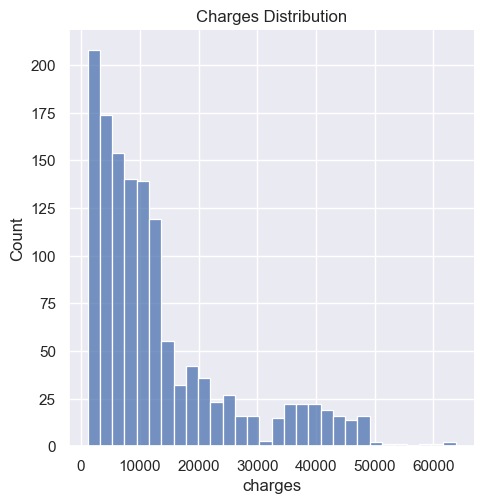

In [36]:
# Charges distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])# displot says how the values are distributed throughout the dataset
plt.title('Charges Distribution')
plt.show()

### Data Pre-processing


In [37]:
# convert text data to numerical data (encoding)

In [40]:
# encoding sex coloumn
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace = True)

#encoding smoker coloumn
insurance_dataset.replace({'smoker': {'yes':0, 'no':1}}, inplace = True)

#encoding region coloumn
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)

In [43]:
display(insurance_dataset)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the Features and Target

In [45]:
X = insurance_dataset.drop(columns='charges', axis=1) # axis is 0 for a row and 1 for coloumn
Y = insurance_dataset['charges']

print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the Data into Training and Testing Data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [49]:
# loading linear regression model
regressor = LinearRegression()

In [88]:
regressor.fit(X_train.values, Y_train)

LinearRegression()

### Model Evaluation

In [89]:
#prediction on the training data|
training_data_prediction = regressor.predict(X_train.values)

In [90]:
# R squared value (is a performance matrix and lies between 0 to 1, determines how well the model is working)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value:', r2_train)

R squared value: 0.751505643411174


In [91]:
#prediction on the test data
test_data_prediction = regressor.predict(X_test.values)

In [92]:
# R squared value 
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.7447273869684077


### Building a Predictive System

In [93]:
#Method 1
input_data=(31,1,25.74,0,1,0)

# stored in () this is a tuple so we'll change it into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is USD', prediction[0])

The insurance cost is USD 3760.0805764960423


In [96]:
#Method 2

feature_names = ["age", "sex", "bmi", "children", "smoker","region"]

input_data = (31, 1, 25.74, 0, 1, 0)

# Create DataFrame and assign feature names (if applicable)
input_data_as_dataframe = pd.DataFrame([input_data])
input_data_as_dataframe.columns = feature_names

# Reshape using iloc
input_data_reshaped = input_data_as_dataframe.iloc[0,:].values.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

print('The insurance cost is USD', prediction[0])



The insurance cost is USD 3760.0805764960423
